# Pandas

## What is Pandas?
A Python library for data handling.

## Why use Pandas?
We will use Pandas to read in our data, clean the data, and even perform feature engineering.

## Import Pandas
To import Pandas do the following:

In [ ]:
import pandas as pd

# Pandas Series
*   Similar to a numpy array.
*   It includes a index which we'll use to grab data from the array

## pd.Series(data, index)
We can generate a Pandas Series:

In [ ]:
salesQ1 = pd.Series(data=[250, 350, 450, 550], index=['USA', 'China', 'Hong Kong', 'Singapore'])
salesQ1

USA          250
China        350
Hong Kong    450
Singapore    550
dtype: int64

## Single Element [index # or name]
To grab a single element:

In [ ]:
salesQ1['Hong Kong']

450

In [ ]:
salesQ1[3]

550

# Pandas Dataframes - Part One


*   Multiple pandas series that share the same index.
*   Similar to a spreadsheet.

## pd.DataFrame(data, index, columns)
We can generate a Dataframe when we have these three elements:

In [ ]:
import numpy as np
from numpy.random import randint

In [ ]:
columns = ['W', 'X', 'Y', 'Z']
index = ['A', 'B', 'C', 'D', 'E']
np.random.seed(42)
data = randint(0, 50, (5, 4))
data

array([[38, 28, 14, 42],
       [ 7, 20, 38, 18],
       [22, 10, 10, 23],
       [35, 39, 23,  2],
       [21,  1, 23, 43]])

In [ ]:
df = pd.DataFrame(data, index, columns)
df

,W,X,Y,Z
A,38,28,14,42
B,7,20,38,18
C,22,10,10,23
D,35,39,23,2
E,21,1,23,43


## Grabbing Data from Dataframe Column [column index]
By providing these pieces of data we can fetch it:

In [ ]:
df['W']

A    38
B     7
C    22
D    35
E    21
Name: W, dtype: int64

In [ ]:
df[['W', 'Z']]

,W,Z
A,38,42
B,7,18
C,22,23
D,35,2
E,21,43


## Creating a new column
We can create new columns by entering some information:

In [ ]:
df['new'] = df['W'] + df['Z']
df

,W,X,Y,Z,new
A,38,28,14,42,80
B,7,20,38,18,25
C,22,10,10,23,45
D,35,39,23,2,37
E,21,1,23,43,64


## df.drop('column or row name', axis=1)
We can remove entire columns:
*  We must reassign df to make this change to persist.

In [ ]:
df = df.drop('new', axis=1)
df

,W,X,Y,Z
A,38,28,14,42
B,7,20,38,18
C,22,10,10,23
D,35,39,23,2
E,21,1,23,43


## df.loc['row index']
We can fetch rows:

In [ ]:
df.loc['A']

W    38
X    28
Y    14
Z    42
Name: A, dtype: int64

In [ ]:
df.loc[['A', 'E']]

,W,X,Y,Z
A,38,28,14,42
E,21,1,23,43


## df.iloc[row position]
We can fetch row data by providing row position:

In [ ]:
df.iloc[1]

W     7
X    20
Y    38
Z    18
Name: B, dtype: int64

In [ ]:
df.iloc[3:]

,W,X,Y,Z
D,35,39,23,2
E,21,1,23,43


# Pandas Dataframes - Part Two

In [ ]:
df

,W,X,Y,Z
A,38,28,14,42
B,7,20,38,18
C,22,10,10,23
D,35,39,23,2
E,21,1,23,43


## Conditional Selection
In pandas we can also set conditions on our Dataframes:

In [ ]:
df > 7

,W,X,Y,Z
A,True,True,True,True
B,False,True,True,True
C,True,True,True,True
D,True,True,True,False
E,True,False,True,True


In [ ]:
df['X'] > 11

A     True
B     True
C    False
D     True
E    False
Name: X, dtype: bool

## Set index as a column
We can set our index as a column:

In [ ]:
df.reset_index()

,index,W,X,Y,Z
0,A,38,28,14,42
1,B,7,20,38,18
2,C,22,10,10,23
3,D,35,39,23,2
4,E,21,1,23,43


## Set a Column as the index
We can set a column to occupy the position of the index:

In [ ]:
new_ind = ['CA', 'NY', 'WY', 'OR', 'CO']

In [ ]:
df['States'] = new_ind
df

,W,X,Y,Z,States
A,38,28,14,42,CA
B,7,20,38,18,NY
C,22,10,10,23,WY
D,35,39,23,2,OR
E,21,1,23,43,CO


In [ ]:
df = df.set_index('States')

In [ ]:
df

,W,X,Y,Z
States,,,,
CA,38,28,14,42
NY,7,20,38,18
WY,22,10,10,23
OR,35,39,23,2
CO,21,1,23,43


## df.columns, .index, .describe(), .info() and .dtypes


1.   We can see the columns
2.   We can see whats in the index
3.   We can see the dataframe info
4.   We can see the time nulls and data times
5.   We can see the dataframe data type



In [ ]:
df.columns

Index(['W', 'X', 'Y', 'Z'], dtype='object')

In [ ]:
df.index

Index(['CA', 'NY', 'WY', 'OR', 'CO'], dtype='object', name='States')

In [ ]:
df.describe()

,W,X,Y,Z
count,5.000000,5.000000,5.000000,5.000000
mean,24.600000,19.600000,21.600000,25.600000
std,12.421755,14.876155,10.784248,17.271364
min,7.000000,1.000000,10.000000,2.000000
25%,21.000000,10.000000,14.000000,18.000000
50%,22.000000,20.000000,23.000000,23.000000
75%,35.000000,28.000000,23.000000,42.000000
max,38.000000,39.000000,38.000000,43.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, CA to CO
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   W       5 non-null      int64
 1   X       5 non-null      int64
 2   Y       5 non-null      int64
 3   Z       5 non-null      int64
dtypes: int64(4)
memory usage: 200.0+ bytes


In [ ]:
df.dtypes

W    int64
X    int64
Y    int64
Z    int64
dtype: object

# Pandas Missing Data
When there exists missing data on our data sets we can deal with this problem by:

*  Leave it as missing
*  Remove the missing data
*  Fill in the missing data: Strategies could be finding the mean or based off another column, conceive a reasonable value

## Leave missing data
In case we apply this strategy we would just move on:


In [ ]:
df = pd.DataFrame({'A':[1, 2, np.nan, 4],
                  'B':[5, np.nan, np.nan, 8],
                   'C':[10, 20, 30, 40]})
df

,A,B,C
0,1.0,5.0,10
1,2.0,NaN,20
2,NaN,NaN,30
3,4.0,8.0,40


## df.dropna()
We can remove the missing data on a dataframe:

In [ ]:
df.dropna()

,A,B,C
0,1.0,5.0,10
3,4.0,8.0,40


In [ ]:
df.dropna(axis=1)

,C
0,10
1,20
2,30
3,40


## df.fillna()
We can fill in the missing data:

In [ ]:
df.fillna(value='FILL VALUE')

,A,B,C
0,1,5,10
1,2,FILL VALUE,20
2,FILL VALUE,FILL VALUE,30
3,4,8,40


In [ ]:
df.fillna(value=0)

,A,B,C
0,1.0,5.0,10
1,2.0,0.0,20
2,0.0,0.0,30
3,4.0,8.0,40


In [ ]:
df['A'] = df['A'].fillna(value=0)
df

,A,B,C
0,1.0,5.0,10
1,2.0,NaN,20
2,0.0,NaN,30
3,4.0,8.0,40


In [ ]:
df['B'] = df['B'].fillna(value=df['B'].mean())
df

,A,B,C
0,1.0,5.0,10
1,2.0,6.5,20
2,0.0,6.5,30
3,4.0,8.0,40


In [ ]:
df = df.fillna(df.mean())
df

,A,B,C
0,1.0,5.0,10
1,2.0,6.5,20
2,0.0,6.5,30
3,4.0,8.0,40


# GroupBy Operations
This operation allows us to:
*  Group rows of data together and call agregate functions.

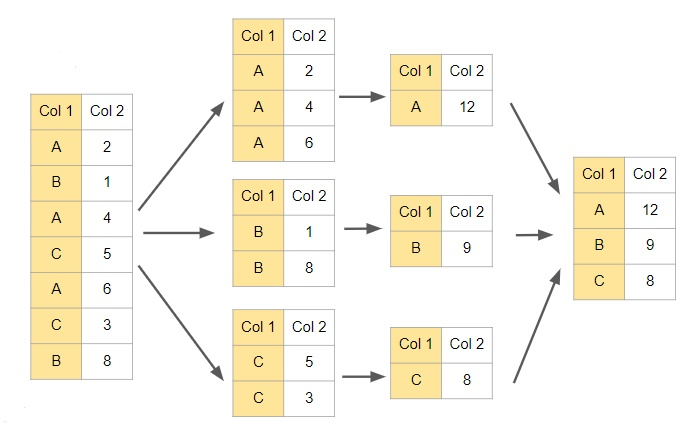

## df.groupby('column name').operation(mean, sum, std, unique values, # of unique values, count, max, etc...)
We can group rows:

In [ ]:
df = pd.read_csv('Universities.csv')
df.head()

,Sector,University,Year,Completions,Geography
0,"Private for-profit, 2-year",Pima Medical Institute-Las Vegas,2016,591,Nevada
1,"Private for-profit, less-than 2-year",Healthcare Preparatory Institute,2016,28,Nevada
2,"Private for-profit, less-than 2-year",Milan Institute-Las Vegas,2016,408,Nevada
3,"Private for-profit, less-than 2-year",Utah College of Massage Therapy-Vegas,2016,240,Nevada
4,"Public, 4-year or above",Western Nevada College,2016,960,Nevada


In [ ]:
df.groupby('Year').sum()

,Completions
Year,
2012,20333
2013,21046
2014,24730
2015,26279
2016,26224


In [ ]:
df.groupby('Year').describe().transpose()

Year                      2012         2013  ...         2015         2016
Completions count    38.000000    40.000000  ...    44.000000    43.000000
            mean    535.078947   526.150000  ...   597.250000   609.860465
            std    1036.433239  1040.474782  ...  1183.371791  1235.952796
            min      13.000000     0.000000  ...     0.000000     0.000000
            25%     114.250000    98.500000  ...    87.750000    90.000000
            50%     229.500000   189.000000  ...   191.000000   208.000000
            75%     420.500000   413.000000  ...   405.750000   414.000000
            max    5388.000000  5278.000000  ...  5335.000000  5367.000000

[8 rows x 5 columns]

# Pandas Operations
With this feature we can apply mathematical logic on our DataFrames.

## df['col name'].unique()
This will return the unique values of the column:

In [ ]:
df_one = pd.DataFrame({'k1':['A', 'A', 'B', 'B', 'C', 'C'],
                   'col1':[100, 200, 300, 300, 400, 500],
                   'col2':['NY', 'CA', 'WA', 'WA', 'AK', 'NV']})
df_one

,k1,col1,col2
0,A,100,NY
1,A,200,CA
2,B,300,WA
3,B,300,WA
4,C,400,AK
5,C,500,NV


In [ ]:
df_one['k1'].unique()

array(['A', 'B', 'C'], dtype=object)

## df['col name'].nunique()
This will return the number of unique values in a column:

In [ ]:
df_one['k1'].nunique()

3

## df['col name'].value_counts()
This will return the number of values repeated in a column:


In [ ]:
df_one['k1'].value_counts()

A    2
B    2
C    2
Name: k1, dtype: int64

## df.drop_duplicates()
This will remove duplicates in the dataFrame:

In [ ]:
df_one.drop_duplicates()

,k1,col1,col2
0,A,100,NY
1,A,200,CA
2,B,300,WA
4,C,400,AK
5,C,500,NV


## df['col name'].apply(function)
We can apply functions inside the dataframe:
*  Make sure to apply functions where data types match

In [ ]:
def grab_first_letter(state):
  return state[0]

In [ ]:
grab_first_letter('NY')

'N'

In [ ]:
df_one['col2'].apply(grab_first_letter)

0    N
1    C
2    W
3    W
4    A
5    N
Name: col2, dtype: object

In [ ]:
df_one['first letter'] = df_one['col2'].apply(grab_first_letter)
df_one

,k1,col1,col2,num,first letter
0,A,100,NY,1,N
1,A,200,CA,1,C
2,B,300,WA,2,W
3,B,300,WA,2,W
4,C,400,AK,3,A
5,C,500,NV,3,N


## df['col name'].map(list, dictionary)
With this we can map through a dictionary and apply those changes on our df:

In [ ]:
my_map = {'A': 1, 'B': 2, 'C': 3}

In [ ]:
df_one['k1'].map(my_map)

0    1
1    1
2    2
3    2
4    3
5    3
Name: k1, dtype: int64

In [ ]:
df_one['num'] = df_one['k1'].map(my_map)
df_one

,k1,col1,col2,num,first letter
0,A,100,NY,1,N
1,A,200,CA,1,C
2,B,300,WA,2,W
3,B,300,WA,2,W
4,C,400,AK,3,A
5,C,500,NV,3,N


## df['col name'].max()
This will return the max value of a column:
* This applies to .min() as well

In [ ]:
df['col1'].max()

500

## df['col1'].idxmax()
This will return the position of the max value in a column:
* This applies to .idxmin() as well

In [ ]:
df_one['col1'].idxmax()

5

## df.columns
This will return all the columns of the df:
*  We can reassign new column values. **This change will be permanent**

In [ ]:
df_one.columns

Index(['k1', 'col1', 'col2', 'num', 'first letter'], dtype='object')

In [ ]:
df_one.columns = ['C1', 'c2', 'c3', 'c4', 'c5']
df_one

,C1,c2,c3,c4,c5
0,A,100,NY,1,N
1,A,200,CA,1,C
2,B,300,WA,2,W
3,B,300,WA,2,W
4,C,400,AK,3,A
5,C,500,NV,3,N


## df.sort_values('col name', ascending or descending = false or true)
We can sort the columns:

In [ ]:
df_one.sort_values('c3')

,C1,c2,c3,c4,c5
4,C,400,AK,3,A
1,A,200,CA,1,C
5,C,500,NV,3,N
0,A,100,NY,1,N
2,B,300,WA,2,W
3,B,300,WA,2,W


## pd.concat([first df, second df], axis=1)
With this we can join two dataframes into a single dataframe:

In [ ]:
features = pd.DataFrame({'A':[100, 200, 300, 400, 500],
                         'B':[12, 13, 14, 15, 16]})
features

,A,B
0,100,12
1,200,13
2,300,14
3,400,15
4,500,16


In [ ]:
predictions = pd.DataFrame({'pred':[0, 1, 1, 0, 1]})
predictions

,pred
0,0
1,1
2,1
3,0
4,1


In [ ]:
pd.concat([features, predictions], axis=1)

,A,B,pred
0,100,12,0
1,200,13,1
2,300,14,1
3,400,15,0
4,500,16,1


## pd.get_dummies(df['col name'])
With this returns as many columns as there are categories in a column and it returns 1 if it matches up:

In [ ]:
df_one

,C1,c2,c3,c4,c5
0,A,100,NY,1,N
1,A,200,CA,1,C
2,B,300,WA,2,W
3,B,300,WA,2,W
4,C,400,AK,3,A
5,C,500,NV,3,N


In [ ]:
pd.get_dummies(df_one['C1'])

,A,B,C
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1
5,0,0,1


# Data Input and Output
Pandas can not only read csv files, Pandas has robust IO tools we can use to read data from a variety of different files

Visit this page to check the available IO tools pandas has to offer:
[IO Tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

In [ ]:
ls

sample_data/  Universities.csv
